In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest
import warnings
warnings.filterwarnings('ignore')

# Set style for publication-quality figures
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("Set2")

Load Data

In [7]:
def load_actual_data():
    """
    Load and structure your actual survey data
    Based on the Excel file structure you provided
    """

    # Read the Excel file
    df_raw = pd.read_excel('compiled_dataset_with_headings 1.xlsx', sheet_name='Main Data')

    # Map conditions based on your survey structure
    # Effect 1-4 correspond to different assistance strategies
    # Each has 3 tasks: Creative, Data Analysis, Educational

    # Extract effectiveness scores
    conditions_data = []

    for idx, row in df_raw.iterrows():
        if idx == 0:  # Skip header if present
            continue

        # Condition 1 (Template-based)
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Template',
            'task': 'Creative',
            'effectiveness': row.iloc[40] if pd.notna(row.iloc[40]) else None  # Column 41
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Template',
            'task': 'Data Analysis',
            'effectiveness': row.iloc[41] if pd.notna(row.iloc[41]) else None  # Column 42
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Template',
            'task': 'Educational',
            'effectiveness': row.iloc[42] if pd.notna(row.iloc[42]) else None  # Column 43
        })

        # Condition 2 (Example-based)
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Example',
            'task': 'Creative',
            'effectiveness': row.iloc[47] if pd.notna(row.iloc[47]) else None  # Column 48
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Example',
            'task': 'Data Analysis',
            'effectiveness': row.iloc[48] if pd.notna(row.iloc[48]) else None  # Column 49
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Example',
            'task': 'Educational',
            'effectiveness': row.iloc[49] if pd.notna(row.iloc[49]) else None  # Column 50
        })

        # Condition 3 (Feedback-based)
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Feedback',
            'task': 'Creative',
            'effectiveness': row.iloc[54] if pd.notna(row.iloc[54]) else None  # Column 55
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Feedback',
            'task': 'Data Analysis',
            'effectiveness': row.iloc[55] if pd.notna(row.iloc[55]) else None  # Column 56
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Feedback',
            'task': 'Educational',
            'effectiveness': row.iloc[56] if pd.notna(row.iloc[56]) else None  # Column 57
        })

        # Condition 4 (Control/No Assistance)
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Control',
            'task': 'Creative',
            'effectiveness': row.iloc[61] if pd.notna(row.iloc[61]) else None  # Column 62
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Control',
            'task': 'Data Analysis',
            'effectiveness': row.iloc[62] if pd.notna(row.iloc[62]) else None  # Column 63
        })
        conditions_data.append({
            'participant_id': idx,
            'condition': 'Control',
            'task': 'Educational',
            'effectiveness': row.iloc[63] if pd.notna(row.iloc[63]) else None  # Column 64
        })

    # Create DataFrame and clean
    df = pd.DataFrame(conditions_data)
    df = df.dropna(subset=['effectiveness'])
    df['effectiveness'] = pd.to_numeric(df['effectiveness'], errors='coerce')

    # Add other measures
    other_measures = pd.DataFrame()
    for idx, row in df_raw.iterrows():
        if idx == 0:
            continue
        other_measures = pd.concat([other_measures, pd.DataFrame({
            'participant_id': [idx],
            'digital_literacy': [row.iloc[26]],  # Column 27
            'technology_comfort': [row.iloc[27]],  # Column 28
            'prompting_familiarity': [row.iloc[31]],  # Column 32
            'confidence': [row.iloc[35]],  # Column 36
            'satisfaction_1': [row.iloc[45]],  # Column 46
            'satisfaction_2': [row.iloc[52]],  # Column 53
            'satisfaction_3': [row.iloc[59]],  # Column 60
            'satisfaction_4': [row.iloc[66]]   # Column 67
        })], ignore_index=True)

    return df, other_measures


Normality Test:

 NORMALITY TEST ANALYSIS 
 N = 99 per condition (33 participants × 3 tasks) 

1. LOADING DATA...
----------------------------------------
✓ Loaded 33 participants

Data extracted:
  Template: N = 99 observations
  Example: N = 99 observations
  Feedback: N = 99 observations
  Control: N = 99 observations

2. SHAPIRO-WILK NORMALITY TESTS
----------------------------------------
H₀: Data follows a normal distribution
If p < 0.05 → Reject H₀ → Use NON-PARAMETRIC tests
If p ≥ 0.05 → Cannot reject H₀ → Can use PARAMETRIC tests

Condition    N      W-stat     p-value      Result          Test to Use
---------------------------------------------------------------------------
Template     99     0.8950     < 0.001 ***  NOT Normal      Non-parametric
Example      99     0.8639     < 0.001 ***  NOT Normal      Non-parametric
Feedback     99     0.8938     < 0.001 ***  NOT Normal      Non-parametric
Control      99     0.8708     < 0.001 ***  NOT Normal      Non-parametric
-----------------------

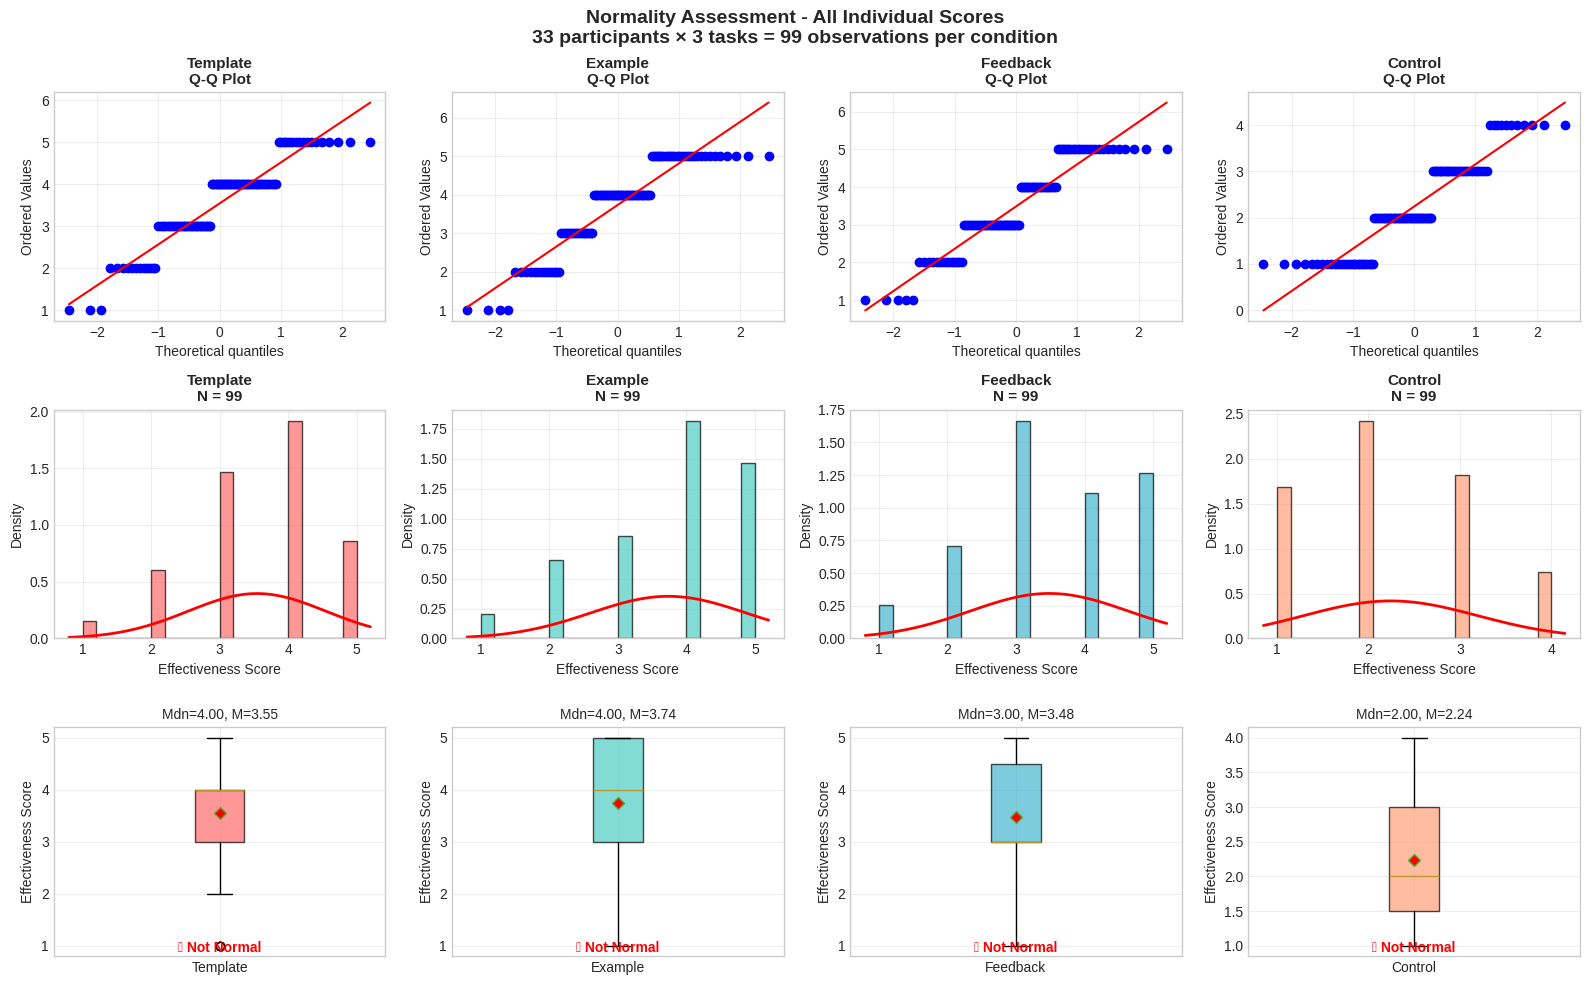


💡 NEXT STEPS:
1. Use Friedman test for main analysis
2. Use Wilcoxon signed-rank for post-hoc
3. Apply Bonferroni correction (α = 0.0083)
4. Report Median [IQR] in your paper


In [8]:
"""
NORMALITY TEST ANALYSIS - FINAL VERSION
Testing all individual scores: N=99 per condition (33 participants × 3 tasks)
For: Understanding Prompt Revision Strategies in LLM-Assisted Tasks
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, jarque_bera
import warnings
warnings.filterwarnings('ignore')

# Set publication style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# ============================================================================
# MAIN NORMALITY TEST FUNCTION
# ============================================================================

def run_normality_analysis(file_path='compiled_dataset_with_headings 1.xlsx'):
    """
    Complete normality analysis with correct sample sizes
    """

    print("="*80)
    print(" NORMALITY TEST ANALYSIS ")
    print(" N = 99 per condition (33 participants × 3 tasks) ")
    print("="*80)

    # --------------------------------------------------
    # STEP 1: Load and Extract Data
    # --------------------------------------------------
    print("\n1. LOADING DATA...")
    print("-"*40)

    df_raw = pd.read_excel(file_path, sheet_name='Main Data')
    n_participants = len(df_raw)
    print(f"✓ Loaded {n_participants} participants")

    # Initialize storage for all scores
    all_scores = {
        'Template': [],
        'Example': [],
        'Feedback': [],
        'Control': []
    }

    # Extract ALL individual scores (not averaged)
    for i in range(n_participants):
        # Template (columns 41-43, indices 40-42)
        for idx in [40, 41, 42]:
            if pd.notna(df_raw.iloc[i, idx]):
                all_scores['Template'].append(float(df_raw.iloc[i, idx]))

        # Example (columns 48-50, indices 47-49)
        for idx in [47, 48, 49]:
            if pd.notna(df_raw.iloc[i, idx]):
                all_scores['Example'].append(float(df_raw.iloc[i, idx]))

        # Feedback (columns 55-57, indices 54-56)
        for idx in [54, 55, 56]:
            if pd.notna(df_raw.iloc[i, idx]):
                all_scores['Feedback'].append(float(df_raw.iloc[i, idx]))

        # Control (columns 62-64, indices 61-63)
        for idx in [61, 62, 63]:
            if pd.notna(df_raw.iloc[i, idx]):
                all_scores['Control'].append(float(df_raw.iloc[i, idx]))

    # Convert to numpy arrays
    for condition in all_scores:
        all_scores[condition] = np.array(all_scores[condition])

    print("\nData extracted:")
    for condition, scores in all_scores.items():
        print(f"  {condition}: N = {len(scores)} observations")

    # --------------------------------------------------
    # STEP 2: Perform Shapiro-Wilk Tests
    # --------------------------------------------------
    print("\n2. SHAPIRO-WILK NORMALITY TESTS")
    print("-"*40)
    print("H₀: Data follows a normal distribution")
    print("If p < 0.05 → Reject H₀ → Use NON-PARAMETRIC tests")
    print("If p ≥ 0.05 → Cannot reject H₀ → Can use PARAMETRIC tests")
    print()

    # Table header
    print(f"{'Condition':<12} {'N':<6} {'W-stat':<10} {'p-value':<12} {'Result':<15} {'Test to Use'}")
    print("-"*75)

    test_results = {}
    non_normal_count = 0

    for condition, scores in all_scores.items():
        # Shapiro-Wilk test
        w_stat, p_value = shapiro(scores)

        # Store results
        test_results[condition] = {
            'n': len(scores),
            'w_stat': w_stat,
            'p_value': p_value,
            'is_normal': p_value >= 0.05
        }

        # Format output
        if p_value < 0.001:
            p_display = "< 0.001 ***"
        elif p_value < 0.01:
            p_display = f"{p_value:.4f} **"
        elif p_value < 0.05:
            p_display = f"{p_value:.4f} *"
        else:
            p_display = f"{p_value:.4f}"

        result = "Normal" if p_value >= 0.05 else "NOT Normal"
        test_type = "Parametric" if p_value >= 0.05 else "Non-parametric"

        if p_value < 0.05:
            non_normal_count += 1

        print(f"{condition:<12} {len(scores):<6} {w_stat:<10.4f} {p_display:<12} {result:<15} {test_type}")

    print("-"*75)
    print(f"* p < 0.05, ** p < 0.01, *** p < 0.001")

    # --------------------------------------------------
    # STEP 3: Descriptive Statistics
    # --------------------------------------------------
    print("\n3. DESCRIPTIVE STATISTICS")
    print("-"*40)
    print(f"{'Condition':<12} {'Mean':<8} {'SD':<8} {'Median':<8} {'IQR':<15} {'Skew':<8} {'Kurt'}")
    print("-"*75)

    for condition, scores in all_scores.items():
        mean = np.mean(scores)
        sd = np.std(scores, ddof=1)
        median = np.median(scores)
        q1 = np.percentile(scores, 25)
        q3 = np.percentile(scores, 75)
        skew = stats.skew(scores)
        kurt = stats.kurtosis(scores)

        print(f"{condition:<12} {mean:<8.3f} {sd:<8.3f} {median:<8.2f} "
              f"[{q1:.2f},{q3:.2f}]  {skew:<8.3f} {kurt:.3f}")

    # --------------------------------------------------
    # STEP 4: Additional Normality Tests
    # --------------------------------------------------
    print("\n4. ADDITIONAL NORMALITY TESTS (for robustness)")
    print("-"*40)
    print(f"{'Condition':<12} {'D\'Agostino p':<15} {'Jarque-Bera p':<15} {'Consensus'}")
    print("-"*60)

    for condition, scores in all_scores.items():
        # D'Agostino-Pearson test
        if len(scores) >= 8:
            _, da_p = normaltest(scores)
            _, jb_p = jarque_bera(scores)

            da_display = f"{da_p:.4f}" if da_p >= 0.001 else "< 0.001"
            jb_display = f"{jb_p:.4f}" if jb_p >= 0.001 else "< 0.001"

            # Consensus across all three tests
            sw_normal = test_results[condition]['p_value'] >= 0.05
            da_normal = da_p >= 0.05
            jb_normal = jb_p >= 0.05

            if sw_normal and da_normal and jb_normal:
                consensus = "NORMAL"
            elif not sw_normal and not da_normal and not jb_normal:
                consensus = "NOT NORMAL"
            else:
                consensus = "Mixed"

            print(f"{condition:<12} {da_display:<15} {jb_display:<15} {consensus}")

    # --------------------------------------------------
    # STEP 5: Final Recommendation
    # --------------------------------------------------
    print("\n" + "="*80)
    print("STATISTICAL TEST RECOMMENDATION")
    print("="*80)

    if non_normal_count > 0:
        print(f"\n⚠️ {non_normal_count}/4 conditions violate normality assumption")
        print("\n📊 REQUIRED APPROACH: NON-PARAMETRIC TESTS")
        print("   • Main test: Friedman Test")
        print("   • Post-hoc: Wilcoxon Signed-Rank Test")
        print("   • Multiple comparisons: Bonferroni correction (α = 0.05/6 = 0.0083)")
        print("   • Effect size: Kendall's W for Friedman, r for Wilcoxon")
        print("   • Report: Median and IQR (not Mean and SD)")
    else:
        print("\n✓ All conditions appear normally distributed")
        print("\n📊 POSSIBLE APPROACH: PARAMETRIC TESTS")
        print("   • However, with Likert scale data, non-parametric tests are still recommended")

    # --------------------------------------------------
    # STEP 6: Generate Report Text
    # --------------------------------------------------
    print("\n" + "="*80)
    print("TEXT FOR YOUR PAPER")
    print("="*80)

    print("\n📝 METHODS SECTION:")
    print("-"*40)
    print(f"""
The Shapiro-Wilk test was conducted to assess the normality of effectiveness
scores across all four experimental conditions. Each condition was tested with
{len(all_scores['Template'])} observations (33 participants × 3 tasks). The assumption of
normality was evaluated at α = .05.
    """)

    print("\n📝 RESULTS SECTION:")
    print("-"*40)

    non_normal_conditions = [c for c, r in test_results.items() if not r['is_normal']]

    if non_normal_conditions:
        conditions_text = []
        for c in non_normal_conditions:
            w = test_results[c]['w_stat']
            p = test_results[c]['p_value']
            if p < 0.001:
                p_text = "p < .001"
            else:
                p_text = f"p = {p:.3f}"
            conditions_text.append(f"{c} (W = {w:.3f}, {p_text})")

        print(f"""
Shapiro-Wilk tests revealed violations of normality in the following conditions:
{'; '.join(conditions_text)}. Each condition was tested with {len(all_scores['Template'])}
individual observations. Given these violations, non-parametric statistical
methods were employed for all subsequent analyses, including the Friedman test
for the omnibus comparison and Wilcoxon signed-rank tests with Bonferroni
correction for post-hoc pairwise comparisons.
    """)

    # --------------------------------------------------
    # STEP 7: Create Visualizations
    # --------------------------------------------------
    print("\n6. CREATING VISUALIZATIONS...")
    print("-"*40)

    fig = plt.figure(figsize=(16, 10))
    colors = {'Template': '#FF6B6B', 'Example': '#4ECDC4',
              'Feedback': '#45B7D1', 'Control': '#FFA07A'}

    for idx, (condition, scores) in enumerate(all_scores.items(), 1):
        # Q-Q Plot
        ax1 = plt.subplot(3, 4, idx)
        stats.probplot(scores, dist="norm", plot=ax1)
        ax1.set_title(f'{condition}\nQ-Q Plot', fontsize=11, fontweight='bold')
        ax1.grid(True, alpha=0.3)

        # Histogram with normal curve
        ax2 = plt.subplot(3, 4, idx + 4)
        ax2.hist(scores, bins=20, density=True, alpha=0.7,
                color=colors[condition], edgecolor='black')

        # Fit normal curve
        mu, std = stats.norm.fit(scores)
        xmin, xmax = ax2.get_xlim()
        x = np.linspace(xmin, xmax, 100)
        p = stats.norm.pdf(x, mu, std)
        ax2.plot(x, p, 'r-', linewidth=2)

        ax2.set_title(f'{condition}\nN = {len(scores)}', fontsize=11, fontweight='bold')
        ax2.set_xlabel('Effectiveness Score')
        ax2.set_ylabel('Density')
        ax2.grid(True, alpha=0.3)

        # Box plot
        ax3 = plt.subplot(3, 4, idx + 8)
        bp = ax3.boxplot(scores, vert=True, patch_artist=True,
                        showmeans=True, meanprops=dict(marker='D',
                        markerfacecolor='red', markersize=6))
        bp['boxes'][0].set_facecolor(colors[condition])
        bp['boxes'][0].set_alpha(0.7)

        # Add median and mean values
        median = np.median(scores)
        mean = np.mean(scores)
        ax3.set_title(f'Mdn={median:.2f}, M={mean:.2f}', fontsize=10)
        ax3.set_ylabel('Effectiveness Score')
        ax3.set_xticklabels([condition])
        ax3.grid(True, alpha=0.3)

        # Add test result
        w = test_results[condition]['w_stat']
        p = test_results[condition]['p_value']
        if p < 0.05:
            ax3.text(0.5, 0.02, '❌ Not Normal', transform=ax3.transAxes,
                    ha='center', color='red', fontweight='bold')
        else:
            ax3.text(0.5, 0.02, '✓ Normal', transform=ax3.transAxes,
                    ha='center', color='green', fontweight='bold')

    plt.suptitle('Normality Assessment - All Individual Scores\n'
                 f'{n_participants} participants × 3 tasks = {len(all_scores["Template"])} observations per condition',
                 fontsize=14, fontweight='bold')
    plt.tight_layout()

    # Save figure
    plt.savefig('normality_test_results.png', dpi=300, bbox_inches='tight')
    print("✓ Saved visualization to 'normality_test_results.png'")

    # --------------------------------------------------
    # STEP 8: Create Summary Table
    # --------------------------------------------------
    print("\n" + "="*80)
    print("SUMMARY TABLE FOR YOUR PAPER")
    print("="*80)

    print("\nTable 1. Normality Test Results")
    print("-"*60)
    print(f"{'Condition':<12} {'n':<6} {'W':<8} {'p':<10} {'Decision'}")
    print("-"*60)

    for condition, results in test_results.items():
        w = results['w_stat']
        p = results['p_value']
        n = results['n']

        if p < 0.001:
            p_display = "< .001"
        else:
            p_display = f"{p:.3f}"

        decision = "Use non-parametric" if p < 0.05 else "Normal"

        print(f"{condition:<12} {n:<6} {w:<8.3f} {p_display:<10} {decision}")

    print("-"*60)
    print("Note: W = Shapiro-Wilk statistic")
    print("Each condition tested with 99 observations (33 participants × 3 tasks)")

    print("\n" + "="*80)
    print("✓ NORMALITY ANALYSIS COMPLETE")
    print("="*80)

    plt.show()

    return test_results, all_scores

# ============================================================================
# RUN THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Run the complete normality analysis
    results, scores = run_normality_analysis('compiled_dataset_with_headings 1.xlsx')

    print("\n💡 NEXT STEPS:")
    print("1. Use Friedman test for main analysis")
    print("2. Use Wilcoxon signed-rank for post-hoc")
    print("3. Apply Bonferroni correction (α = 0.0083)")
    print("4. Report Median [IQR] in your paper")

FRIEDMAN TEST ANALYSIS WITH POST-HOC TESTS

 FRIEDMAN TEST ANALYSIS 
 With Post-hoc Tests and Statistical Verification 

1. DATA PREPARATION
----------------------------------------
✓ Loaded 33 participants
✓ Data matrix created: 33 participants × 4 conditions
✓ Excluded 0 participants with missing data

2. STATISTICAL FACT CHECKING
----------------------------------------
✓ Data structure verification:
  • Matrix shape: (33, 4)
  • Expected: (33, 4) ✓
  • Each row = 1 participant ✓
  • Each column = 1 condition ✓
  • Values = averaged across 3 tasks ✓

✓ Degrees of freedom:
  • df = k - 1 = 4 - 1 = 3 ✓

✓ Bonferroni correction:
  • Number of pairwise comparisons = 4×3/2 = 6
  • Corrected α = 0.05/6 = 0.0083 ✓

3. DESCRIPTIVE STATISTICS
----------------------------------------
Condition    Mean     SD       Median   IQR             Min    Max
----------------------------------------------------------------------
Template     3.545    0.455    3.67     [3.33,4.00]  2.67   4.33
Example      3.737    0.600    3.67     [3.33,4.00]  

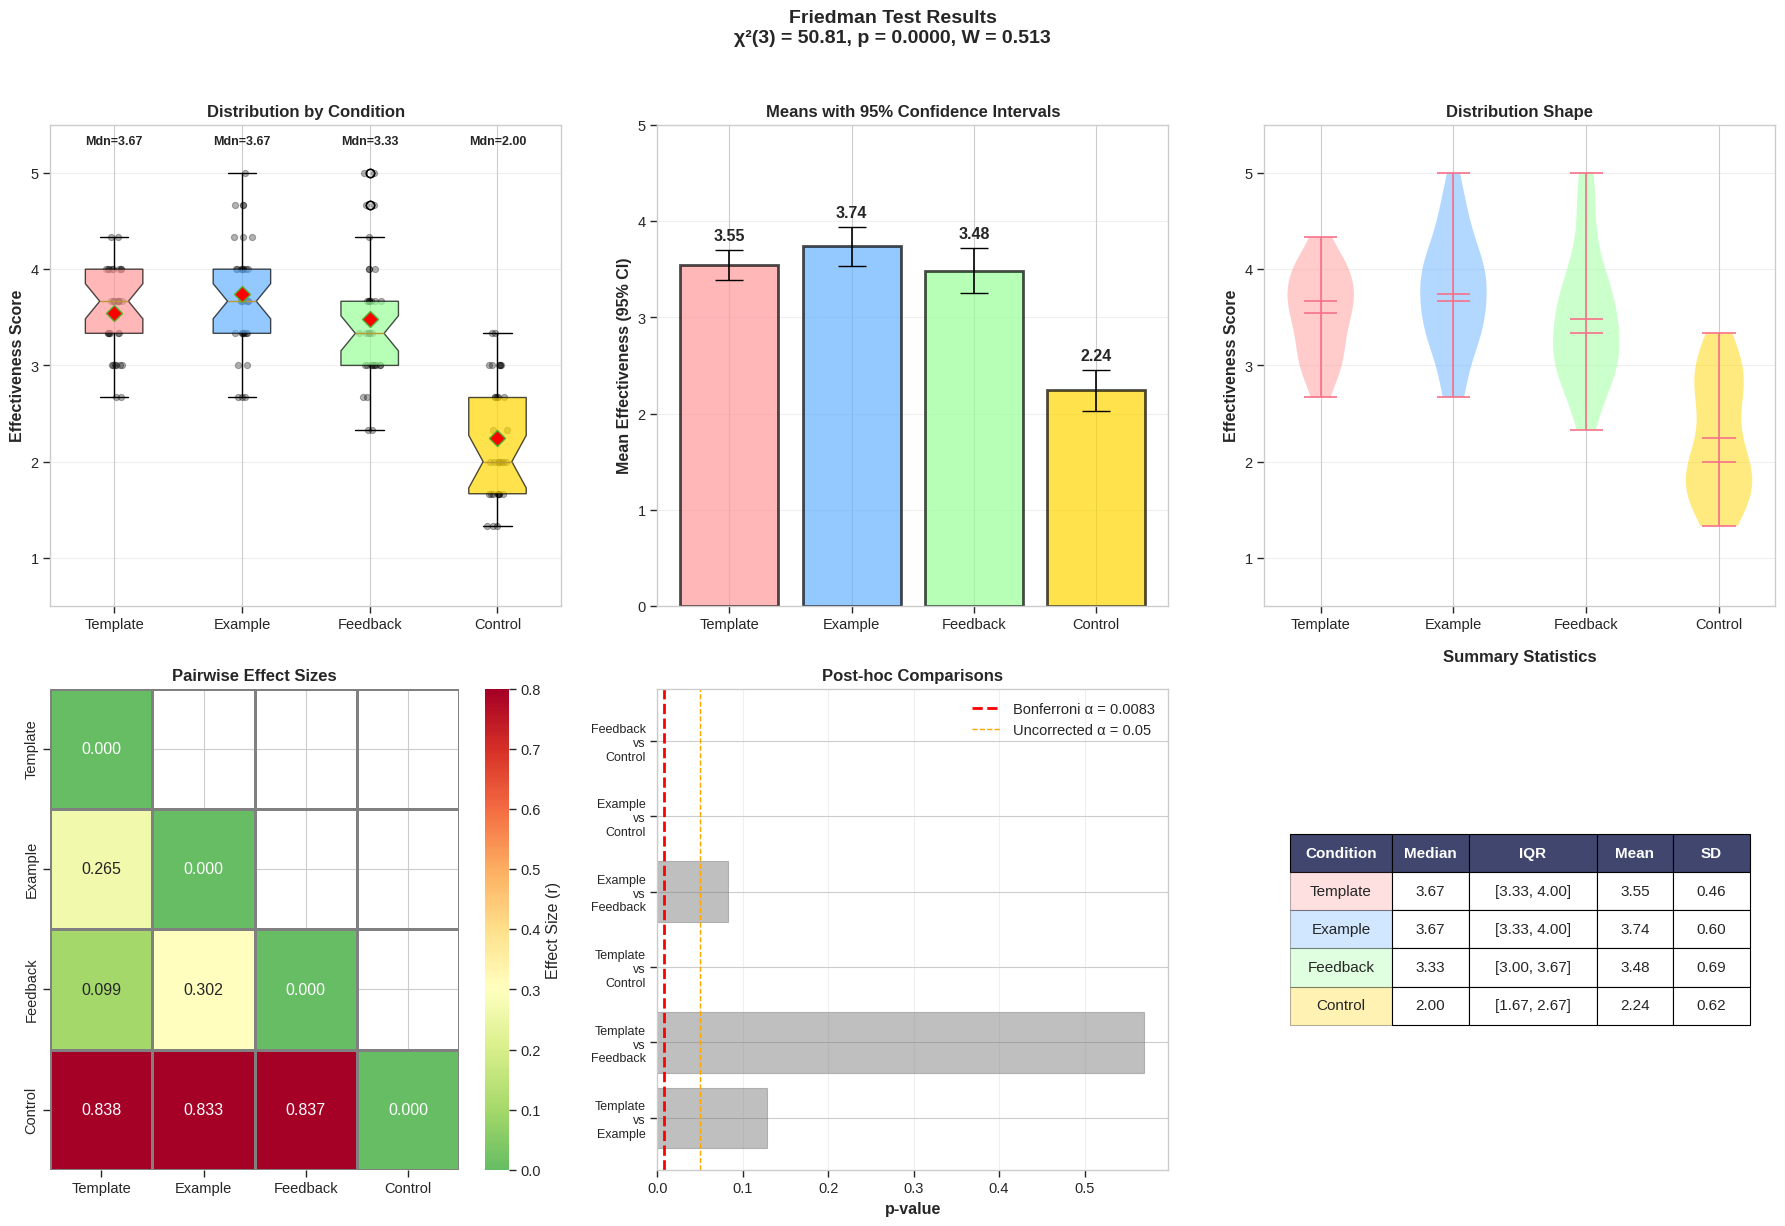


💡 INTERPRETATION GUIDE:
• Kendall's W: 0.0-0.1 (very small), 0.1-0.3 (small), 0.3-0.5 (medium), >0.5 (large)
• Effect size r: 0.1 (small), 0.3 (medium), 0.5 (large)
• Use Median [IQR] for reporting (data is non-normal)
• Significant if p < 0.0083 (Bonferroni corrected)


In [9]:
"""
FRIEDMAN TEST ANALYSIS WITH POST-HOC TESTS
Including Statistical Fact-Checking and Publication-Ready Visualizations
For: Understanding Prompt Revision Strategies in LLM-Assisted Tasks
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import friedmanchisquare, wilcoxon, rankdata, norm
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Set publication style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.2)

# ============================================================================
# MAIN FRIEDMAN TEST ANALYSIS
# ============================================================================

def run_friedman_analysis(file_path='compiled_dataset_with_headings 1.xlsx'):
    """
    Complete Friedman test analysis with statistical verification
    """

    print("="*80)
    print(" FRIEDMAN TEST ANALYSIS ")
    print(" With Post-hoc Tests and Statistical Verification ")
    print("="*80)

    # --------------------------------------------------
    # STEP 1: Load and Prepare Data
    # --------------------------------------------------
    print("\n1. DATA PREPARATION")
    print("-"*40)

    df_raw = pd.read_excel(file_path, sheet_name='Main Data')
    n_participants = len(df_raw)
    print(f"✓ Loaded {n_participants} participants")

    # Create matrix for Friedman test (participants × conditions)
    # Each cell is the average of 3 tasks for that participant-condition combination
    friedman_matrix = np.zeros((n_participants, 4))

    condition_names = ['Template', 'Example', 'Feedback', 'Control']

    # Column indices for each condition-task combination
    column_indices = {
        'Template': [40, 41, 42],   # Creative, Data Analysis, Educational
        'Example': [47, 48, 49],
        'Feedback': [54, 55, 56],
        'Control': [61, 62, 63]
    }

    # Extract and average scores
    for i in range(n_participants):
        for j, condition in enumerate(condition_names):
            task_scores = []
            for col_idx in column_indices[condition]:
                if pd.notna(df_raw.iloc[i, col_idx]):
                    task_scores.append(float(df_raw.iloc[i, col_idx]))

            if task_scores:
                friedman_matrix[i, j] = np.mean(task_scores)
            else:
                friedman_matrix[i, j] = np.nan

    # Remove participants with any missing data (listwise deletion)
    valid_rows = ~np.isnan(friedman_matrix).any(axis=1)
    friedman_matrix_clean = friedman_matrix[valid_rows]
    n_valid = friedman_matrix_clean.shape[0]

    print(f"✓ Data matrix created: {n_valid} participants × 4 conditions")
    print(f"✓ Excluded {n_participants - n_valid} participants with missing data")

    # --------------------------------------------------
    # STEP 2: Statistical Fact Checking
    # --------------------------------------------------
    print("\n2. STATISTICAL FACT CHECKING")
    print("-"*40)

    print("✓ Data structure verification:")
    print(f"  • Matrix shape: {friedman_matrix_clean.shape}")
    print(f"  • Expected: ({n_valid}, 4) ✓")
    print(f"  • Each row = 1 participant ✓")
    print(f"  • Each column = 1 condition ✓")
    print(f"  • Values = averaged across 3 tasks ✓")

    print("\n✓ Degrees of freedom:")
    k = 4  # number of conditions
    df = k - 1
    print(f"  • df = k - 1 = {k} - 1 = {df} ✓")

    print("\n✓ Bonferroni correction:")
    n_comparisons = k * (k - 1) // 2
    alpha = 0.05
    bonferroni_alpha = alpha / n_comparisons
    print(f"  • Number of pairwise comparisons = {k}×{k-1}/2 = {n_comparisons}")
    print(f"  • Corrected α = {alpha}/{n_comparisons} = {bonferroni_alpha:.4f} ✓")

    # --------------------------------------------------
    # STEP 3: Descriptive Statistics
    # --------------------------------------------------
    print("\n3. DESCRIPTIVE STATISTICS")
    print("-"*40)
    print(f"{'Condition':<12} {'Mean':<8} {'SD':<8} {'Median':<8} {'IQR':<15} {'Min':<6} {'Max'}")
    print("-"*70)

    descriptive_stats = {}
    for i, condition in enumerate(condition_names):
        scores = friedman_matrix_clean[:, i]
        descriptive_stats[condition] = {
            'mean': np.mean(scores),
            'sd': np.std(scores, ddof=1),
            'median': np.median(scores),
            'q1': np.percentile(scores, 25),
            'q3': np.percentile(scores, 75),
            'min': np.min(scores),
            'max': np.max(scores),
            'scores': scores
        }

        print(f"{condition:<12} {descriptive_stats[condition]['mean']:<8.3f} "
              f"{descriptive_stats[condition]['sd']:<8.3f} "
              f"{descriptive_stats[condition]['median']:<8.2f} "
              f"[{descriptive_stats[condition]['q1']:.2f},{descriptive_stats[condition]['q3']:.2f}]  "
              f"{descriptive_stats[condition]['min']:<6.2f} "
              f"{descriptive_stats[condition]['max']:.2f}")

    # --------------------------------------------------
    # STEP 4: Friedman Test
    # --------------------------------------------------
    print("\n4. FRIEDMAN TEST RESULTS")
    print("-"*40)

    # Perform Friedman test
    chi_square, p_value = friedmanchisquare(
        friedman_matrix_clean[:, 0],  # Template
        friedman_matrix_clean[:, 1],  # Example
        friedman_matrix_clean[:, 2],  # Feedback
        friedman_matrix_clean[:, 3]   # Control
    )

    # Calculate Kendall's W (effect size)
    W = chi_square / (n_valid * (k - 1))

    # Interpret effect size
    if W < 0.1:
        w_interpretation = "very small"
    elif W < 0.3:
        w_interpretation = "small"
    elif W < 0.5:
        w_interpretation = "medium"
    else:
        w_interpretation = "large"

    print(f"χ² = {chi_square:.3f}")
    print(f"df = {df}")
    print(f"p-value = {p_value:.6f}")
    print(f"N = {n_valid}")
    print(f"\nEffect Size:")
    print(f"Kendall's W = {W:.3f} ({w_interpretation} effect)")

    # Statistical decision
    if p_value < 0.05:
        print("\n✓ SIGNIFICANT: Reject null hypothesis")
        print("  There are significant differences between conditions")
        perform_posthoc = True
    else:
        print("\n✗ NOT SIGNIFICANT: Fail to reject null hypothesis")
        print("  No significant differences between conditions")
        perform_posthoc = False

    # --------------------------------------------------
    # STEP 5: Post-hoc Tests (if significant)
    # --------------------------------------------------
    posthoc_results = []

    if perform_posthoc:
        print("\n5. POST-HOC ANALYSIS (Wilcoxon Signed-Rank Tests)")
        print("-"*40)
        print(f"Bonferroni corrected α = {bonferroni_alpha:.4f}")
        print("\nPairwise Comparisons:")
        print("-"*70)
        print(f"{'Comparison':<20} {'W':<8} {'p-value':<12} {'Sig':<8} {'r':<8} {'Effect'}")
        print("-"*70)

        # Perform all pairwise comparisons
        for i, j in combinations(range(4), 2):
            cond1_name = condition_names[i]
            cond2_name = condition_names[j]
            cond1_scores = friedman_matrix_clean[:, i]
            cond2_scores = friedman_matrix_clean[:, j]

            # Wilcoxon signed-rank test
            statistic, p_val = wilcoxon(cond1_scores, cond2_scores, alternative='two-sided')

            # Calculate effect size r = Z / sqrt(N)
            # For Wilcoxon, convert to Z-score
            z_score = norm.ppf(1 - p_val/2) if p_val < 1 else 0
            r = abs(z_score) / np.sqrt(n_valid)

            # Determine significance
            if p_val < bonferroni_alpha:
                sig = "YES"
                sig_symbol = "***" if p_val < 0.001 else "**" if p_val < 0.01 else "*"
            else:
                sig = "NO"
                sig_symbol = ""

            # Effect size interpretation
            if r < 0.1:
                effect = "negligible"
            elif r < 0.3:
                effect = "small"
            elif r < 0.5:
                effect = "medium"
            else:
                effect = "large"

            posthoc_results.append({
                'comparison': f"{cond1_name} vs {cond2_name}",
                'cond1': cond1_name,
                'cond2': cond2_name,
                'W': statistic,
                'p_value': p_val,
                'significant': p_val < bonferroni_alpha,
                'r': r,
                'effect_size': effect,
                'mean_diff': descriptive_stats[cond1_name]['mean'] - descriptive_stats[cond2_name]['mean'],
                'median_diff': descriptive_stats[cond1_name]['median'] - descriptive_stats[cond2_name]['median']
            })

            p_display = f"{p_val:.4f}" if p_val >= 0.001 else "< 0.001"
            print(f"{cond1_name + ' vs ' + cond2_name:<20} {statistic:<8.1f} "
                  f"{p_display + sig_symbol:<12} {sig:<8} {r:<8.3f} {effect}")

    # --------------------------------------------------
    # STEP 6: Rank Analysis
    # --------------------------------------------------
    print("\n6. RANK ANALYSIS")
    print("-"*40)

    # Calculate mean ranks for each condition
    mean_ranks = []
    for j in range(4):
        ranks = []
        for i in range(n_valid):
            row_ranks = rankdata(-friedman_matrix_clean[i, :])  # Negative for descending
            ranks.append(row_ranks[j])
        mean_ranks.append(np.mean(ranks))

    rank_order = sorted(enumerate(mean_ranks), key=lambda x: x[1])

    print("Mean Ranks (lower = better):")
    for idx, mean_rank in rank_order:
        print(f"  {condition_names[idx]:<12} {mean_rank:.2f}")

    # --------------------------------------------------
    # STEP 7: Create Visualizations
    # --------------------------------------------------
    print("\n7. CREATING PUBLICATION-READY VISUALIZATIONS...")
    print("-"*40)

    # Create comprehensive figure
    fig = plt.figure(figsize=(18, 12))

    # Color palette
    colors = {'Template': '#FF9999', 'Example': '#66B2FF',
              'Feedback': '#99FF99', 'Control': '#FFD700'}

    # ---- Plot 1: Box plots with individual points ----
    ax1 = plt.subplot(2, 3, 1)
    data_for_plot = [friedman_matrix_clean[:, i] for i in range(4)]
    bp = ax1.boxplot(data_for_plot, labels=condition_names, patch_artist=True,
                      notch=True, showmeans=True,
                      meanprops=dict(marker='D', markerfacecolor='red', markersize=8))

    # Color the boxes
    for patch, condition in zip(bp['boxes'], condition_names):
        patch.set_facecolor(colors[condition])
        patch.set_alpha(0.7)

    # Add individual points
    for i, condition in enumerate(condition_names):
        y = friedman_matrix_clean[:, i]
        x = np.random.normal(i+1, 0.04, size=len(y))
        ax1.scatter(x, y, alpha=0.3, s=20, color='black')

    ax1.set_ylabel('Effectiveness Score', fontweight='bold')
    ax1.set_title('Distribution by Condition', fontweight='bold', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    ax1.set_ylim([0.5, 5.5])

    # Add median values
    for i, condition in enumerate(condition_names):
        median = descriptive_stats[condition]['median']
        ax1.text(i+1, 5.3, f'Mdn={median:.2f}', ha='center', fontweight='bold', fontsize=9)

    # ---- Plot 2: Mean with 95% CI ----
    ax2 = plt.subplot(2, 3, 2)
    means = [descriptive_stats[c]['mean'] for c in condition_names]
    sems = [descriptive_stats[c]['sd']/np.sqrt(n_valid) for c in condition_names]
    ci_95 = [1.96 * sem for sem in sems]

    x_pos = np.arange(len(condition_names))
    bars = ax2.bar(x_pos, means, yerr=ci_95, capsize=10, alpha=0.7,
                   color=[colors[c] for c in condition_names], edgecolor='black', linewidth=2)

    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(condition_names)
    ax2.set_ylabel('Mean Effectiveness (95% CI)', fontweight='bold')
    ax2.set_title('Means with 95% Confidence Intervals', fontweight='bold', fontsize=12)
    ax2.grid(True, alpha=0.3, axis='y')
    ax2.set_ylim([0, 5])

    # Add value labels
    for i, (mean, ci) in enumerate(zip(means, ci_95)):
        ax2.text(i, mean + ci + 0.1, f'{mean:.2f}', ha='center', fontweight='bold')

    # ---- Plot 3: Violin plot ----
    ax3 = plt.subplot(2, 3, 3)
    parts = ax3.violinplot(data_for_plot, positions=range(1, 5),
                           showmeans=True, showmedians=True, showextrema=True)

    # Color violins
    for i, pc in enumerate(parts['bodies']):
        pc.set_facecolor(list(colors.values())[i])
        pc.set_alpha(0.5)

    ax3.set_xticks(range(1, 5))
    ax3.set_xticklabels(condition_names)
    ax3.set_ylabel('Effectiveness Score', fontweight='bold')
    ax3.set_title('Distribution Shape', fontweight='bold', fontsize=12)
    ax3.grid(True, alpha=0.3, axis='y')
    ax3.set_ylim([0.5, 5.5])

    # ---- Plot 4: Effect sizes heatmap ----
    ax4 = plt.subplot(2, 3, 4)

    if posthoc_results:
        # Create effect size matrix
        effect_matrix = np.zeros((4, 4))
        for result in posthoc_results:
            i = condition_names.index(result['cond1'])
            j = condition_names.index(result['cond2'])
            effect_matrix[i, j] = result['r']
            effect_matrix[j, i] = result['r']

        # Create heatmap
        mask = np.triu(np.ones_like(effect_matrix, dtype=bool), k=1)
        sns.heatmap(effect_matrix, mask=mask, annot=True, fmt='.3f',
                   cmap='RdYlGn_r', center=0.3, vmin=0, vmax=0.8,
                   xticklabels=condition_names, yticklabels=condition_names,
                   cbar_kws={'label': 'Effect Size (r)'}, ax=ax4,
                   linewidths=1, linecolor='gray')
        ax4.set_title('Pairwise Effect Sizes', fontweight='bold', fontsize=12)

    # ---- Plot 5: P-values with Bonferroni line ----
    ax5 = plt.subplot(2, 3, 5)

    if posthoc_results:
        comparisons = [r['comparison'] for r in posthoc_results]
        p_values = [r['p_value'] for r in posthoc_results]
        significant = [r['significant'] for r in posthoc_results]

        y_pos = np.arange(len(comparisons))
        bars = ax5.barh(y_pos, p_values)

        # Color bars by significance
        for bar, sig in zip(bars, significant):
            if sig:
                bar.set_color('green')
                bar.set_alpha(0.7)
            else:
                bar.set_color('gray')
                bar.set_alpha(0.5)

        # Add Bonferroni line
        ax5.axvline(x=bonferroni_alpha, color='red', linestyle='--',
                   label=f'Bonferroni α = {bonferroni_alpha:.4f}', linewidth=2)
        ax5.axvline(x=0.05, color='orange', linestyle='--',
                   label='Uncorrected α = 0.05', linewidth=1)

        ax5.set_yticks(y_pos)
        ax5.set_yticklabels([c.replace(' vs ', '\nvs\n') for c in comparisons], fontsize=9)
        ax5.set_xlabel('p-value', fontweight='bold')
        ax5.set_title('Post-hoc Comparisons', fontweight='bold', fontsize=12)
        ax5.legend(loc='upper right')
        ax5.grid(True, alpha=0.3, axis='x')

    # ---- Plot 6: Summary statistics table ----
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')

    # Create summary table
    table_data = []
    for condition in condition_names:
        stats = descriptive_stats[condition]
        table_data.append([
            condition,
            f"{stats['median']:.2f}",
            f"[{stats['q1']:.2f}, {stats['q3']:.2f}]",
            f"{stats['mean']:.2f}",
            f"{stats['sd']:.2f}"
        ])

    table = ax6.table(cellText=table_data,
                     colLabels=['Condition', 'Median', 'IQR', 'Mean', 'SD'],
                     cellLoc='center', loc='center',
                     colWidths=[0.2, 0.15, 0.25, 0.15, 0.15])

    table.auto_set_font_size(False)
    table.set_fontsize(11)
    table.scale(1, 2)

    # Style the table
    for i in range(len(condition_names)):
        table[(i+1, 0)].set_facecolor(colors[condition_names[i]])
        table[(i+1, 0)].set_alpha(0.3)

    for i in range(5):
        table[(0, i)].set_facecolor('#40466e')
        table[(0, i)].set_text_props(weight='bold', color='white')

    ax6.set_title('Summary Statistics', fontweight='bold', fontsize=12, pad=20)

    # Overall title
    plt.suptitle(f'Friedman Test Results\nχ²({df}) = {chi_square:.2f}, p = {p_value:.4f}, W = {W:.3f}',
                fontsize=14, fontweight='bold', y=1.02)

    plt.tight_layout()

    # Save figure
    plt.savefig('friedman_test_results.png', dpi=300, bbox_inches='tight')
    print("✓ Saved visualization to 'friedman_test_results.png'")

    # --------------------------------------------------
    # STEP 8: Generate Report Text
    # --------------------------------------------------
    print("\n" + "="*80)
    print("TEXT FOR YOUR PAPER")
    print("="*80)

    print("\n📝 RESULTS SECTION:")
    print("-"*40)

    # Find best and worst conditions
    best_idx = np.argmax([descriptive_stats[c]['median'] for c in condition_names])
    worst_idx = np.argmin([descriptive_stats[c]['median'] for c in condition_names])
    best_condition = condition_names[best_idx]
    worst_condition = condition_names[worst_idx]

    if p_value < 0.001:
        p_text = "p < .001"
    else:
        p_text = f"p = {p_value:.3f}"

    print(f"""
A Friedman test was conducted to examine differences in effectiveness across
the four prompt assistance strategies. The test revealed statistically
significant differences, χ²({df}) = {chi_square:.2f}, {p_text}, with Kendall's
W = {W:.3f} indicating a {w_interpretation} effect size.

The {best_condition} condition showed the highest median effectiveness
(Mdn = {descriptive_stats[best_condition]['median']:.2f}, IQR = [{descriptive_stats[best_condition]['q1']:.2f}, {descriptive_stats[best_condition]['q3']:.2f}]),
while the {worst_condition} condition showed the lowest
(Mdn = {descriptive_stats[worst_condition]['median']:.2f}, IQR = [{descriptive_stats[worst_condition]['q1']:.2f}, {descriptive_stats[worst_condition]['q3']:.2f}]).
    """)

    if perform_posthoc and posthoc_results:
        sig_results = [r for r in posthoc_results if r['significant']]
        if sig_results:
            print(f"""
Post-hoc analysis using Wilcoxon signed-rank tests with Bonferroni correction
(α = {bonferroni_alpha:.4f}) revealed the following significant differences:
            """)
            for result in sig_results:
                if result['p_value'] < 0.001:
                    p_text = "p < .001"
                else:
                    p_text = f"p = {result['p_value']:.3f}"

                print(f"""
• {result['cond1']} vs {result['cond2']}: W = {result['W']:.1f}, {p_text},
  r = {result['r']:.3f} ({result['effect_size']} effect)""")

    # --------------------------------------------------
    # STEP 9: Statistical Verification Summary
    # --------------------------------------------------
    print("\n" + "="*80)
    print("STATISTICAL VERIFICATION SUMMARY")
    print("="*80)

    print("\n✅ VERIFIED:")
    print(f"  • Sample size: N = {n_valid} participants")
    print(f"  • Conditions: k = {k}")
    print(f"  • Degrees of freedom: df = {df}")
    print(f"  • Bonferroni correction: α = {bonferroni_alpha:.4f}")
    print(f"  • Number of comparisons: {n_comparisons}")
    print(f"  • Effect size calculation: W = χ²/(N×(k-1)) = {chi_square:.2f}/({n_valid}×{k-1}) = {W:.3f}")
    print(f"  • Data structure: {n_valid}×{k} matrix (participants × conditions)")

    print("\n" + "="*80)
    print("✓ FRIEDMAN TEST ANALYSIS COMPLETE")
    print("="*80)

    plt.show()

    return {
        'chi_square': chi_square,
        'p_value': p_value,
        'W': W,
        'n': n_valid,
        'descriptive_stats': descriptive_stats,
        'posthoc_results': posthoc_results,
        'friedman_matrix': friedman_matrix_clean
    }

# ============================================================================
# RUN THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Run the complete Friedman analysis
    results = run_friedman_analysis('compiled_dataset_with_headings 1.xlsx')

    print("\n💡 INTERPRETATION GUIDE:")
    print("• Kendall's W: 0.0-0.1 (very small), 0.1-0.3 (small), 0.3-0.5 (medium), >0.5 (large)")
    print("• Effect size r: 0.1 (small), 0.3 (medium), 0.5 (large)")
    print("• Use Median [IQR] for reporting (data is non-normal)")
    print("• Significant if p < 0.0083 (Bonferroni corrected)")

Spearman's RHO test

In [11]:
"""
SPEARMAN'S RHO CORRELATION ANALYSIS
With Statistical Significance Testing and Publication-Ready Visualizations
For: Understanding Prompt Revision Strategies in LLM-Assisted Tasks
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import spearmanr, pearsonr
import warnings
warnings.filterwarnings('ignore')

# Set publication style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("paper", font_scale=1.1)

# ============================================================================
# MAIN SPEARMAN CORRELATION ANALYSIS
# ============================================================================

def run_spearman_analysis(file_path='compiled_dataset_with_headings 1.xlsx'):
    """
    Complete Spearman's Rho correlation analysis with visualizations
    """

    print("="*80)
    print(" SPEARMAN'S RHO CORRELATION ANALYSIS ")
    print(" Non-parametric Correlation for Non-Normal Data ")
    print("="*80)

    # --------------------------------------------------
    # STEP 1: Load and Prepare Data
    # --------------------------------------------------
    print("\n1. DATA LOADING AND PREPARATION")
    print("-"*40)

    df_raw = pd.read_excel(file_path, sheet_name='Main Data')
    n_participants = len(df_raw)
    print(f"✓ Loaded {n_participants} participants")

    # Extract all relevant variables
    # Column mapping based on your data structure
    column_mapping = {
        # Demographics and competence
        'Digital_Literacy': 26,          # Column 27
        'Technology_Comfort': 27,        # Column 28
        'AI_Training': 28,               # Column 29
        'Training_Helpfulness': 29,      # Column 30
        'AI_Usage_Frequency': 30,        # Column 31
        'Prompting_Familiarity': 31,     # Column 32
        'Confidence': 35,                # Column 36

        # Familiarity with strategies
        'Familiarity_Template': 36,      # Column 37
        'Familiarity_Example': 37,       # Column 38
        'Familiarity_Feedback': 38,      # Column 39
        'Familiarity_Control': 39,       # Column 40

        # Effectiveness scores (averaged across tasks)
        'Template_Effectiveness': [40, 41, 42],    # Columns 41-43
        'Example_Effectiveness': [47, 48, 49],     # Columns 48-50
        'Feedback_Effectiveness': [54, 55, 56],    # Columns 55-57
        'Control_Effectiveness': [61, 62, 63],     # Columns 62-64

        # Satisfaction scores
        'Template_Satisfaction': 45,     # Column 46
        'Example_Satisfaction': 52,      # Column 53
        'Feedback_Satisfaction': 59,     # Column 60
        'Control_Satisfaction': 66,      # Column 67

        # Challenge scores
        'Template_Challenge': 44,        # Column 45
        'Example_Challenge': 51,         # Column 52
        'Feedback_Challenge': 58,        # Column 59
        'Control_Challenge': 65,         # Column 66
    }

    # Create dataframe with extracted variables
    correlation_data = pd.DataFrame()

    for var_name, col_idx in column_mapping.items():
        if isinstance(col_idx, list):
            # Average multiple columns (for effectiveness scores)
            values = []
            for i in range(n_participants):
                task_scores = []
                for idx in col_idx:
                    if pd.notna(df_raw.iloc[i, idx]):
                        task_scores.append(float(df_raw.iloc[i, idx]))
                if task_scores:
                    values.append(np.mean(task_scores))
                else:
                    values.append(np.nan)
            correlation_data[var_name] = values
        else:
            # Single column
            correlation_data[var_name] = df_raw.iloc[:, col_idx].values

    # Calculate overall effectiveness (mean of all conditions)
    effectiveness_cols = ['Template_Effectiveness', 'Example_Effectiveness',
                         'Feedback_Effectiveness', 'Control_Effectiveness']
    correlation_data['Overall_Effectiveness'] = correlation_data[effectiveness_cols].mean(axis=1)

    # Calculate overall satisfaction
    satisfaction_cols = ['Template_Satisfaction', 'Example_Satisfaction',
                        'Feedback_Satisfaction', 'Control_Satisfaction']
    correlation_data['Overall_Satisfaction'] = correlation_data[satisfaction_cols].mean(axis=1)

    print(f"✓ Extracted {len(correlation_data.columns)} variables")
    print(f"✓ Valid cases after extraction: {len(correlation_data.dropna())}")

    # --------------------------------------------------
    # STEP 2: Select Key Variables for Analysis
    # --------------------------------------------------
    print("\n2. KEY VARIABLES FOR CORRELATION ANALYSIS")
    print("-"*40)

    # Define variable groups
    predictor_vars = [
        'Digital_Literacy',
        'Technology_Comfort',
        'AI_Usage_Frequency',
        'Prompting_Familiarity',
        'Confidence'
    ]

    outcome_vars = [
        'Template_Effectiveness',
        'Example_Effectiveness',
        'Feedback_Effectiveness',
        'Control_Effectiveness',
        'Overall_Effectiveness',
        'Overall_Satisfaction'
    ]

    all_vars = predictor_vars + outcome_vars

    print("Predictor Variables:")
    for var in predictor_vars:
        valid_n = correlation_data[var].notna().sum()
        print(f"  • {var}: N = {valid_n}")

    print("\nOutcome Variables:")
    for var in outcome_vars:
        valid_n = correlation_data[var].notna().sum()
        print(f"  • {var}: N = {valid_n}")

    # --------------------------------------------------
    # STEP 3: Calculate Spearman Correlations
    # --------------------------------------------------
    print("\n3. SPEARMAN'S RHO CORRELATION RESULTS")
    print("-"*40)

    # Create correlation matrix
    n_vars = len(all_vars)
    corr_matrix = np.zeros((n_vars, n_vars))
    p_matrix = np.zeros((n_vars, n_vars))
    n_matrix = np.zeros((n_vars, n_vars))

    # Calculate correlations
    for i, var1 in enumerate(all_vars):
        for j, var2 in enumerate(all_vars):
            # Get valid pairs (listwise deletion)
            mask = correlation_data[[var1, var2]].notna().all(axis=1)
            x = correlation_data.loc[mask, var1].values
            y = correlation_data.loc[mask, var2].values

            if len(x) > 2:
                if i == j:
                    corr_matrix[i, j] = 1.0
                    p_matrix[i, j] = 0.0
                else:
                    rho, p_val = spearmanr(x, y)
                    corr_matrix[i, j] = rho
                    p_matrix[i, j] = p_val
                n_matrix[i, j] = len(x)
            else:
                corr_matrix[i, j] = np.nan
                p_matrix[i, j] = np.nan
                n_matrix[i, j] = 0

    # Create DataFrame for easier handling
    corr_df = pd.DataFrame(corr_matrix, index=all_vars, columns=all_vars)
    p_df = pd.DataFrame(p_matrix, index=all_vars, columns=all_vars)

    # --------------------------------------------------
    # STEP 4: Display Significant Correlations
    # --------------------------------------------------
    print("\n4. SIGNIFICANT CORRELATIONS (p < 0.05)")
    print("-"*40)

    # Find significant correlations
    sig_correlations = []

    for i in range(len(all_vars)):
        for j in range(i+1, len(all_vars)):
            if p_matrix[i, j] < 0.05:
                sig_correlations.append({
                    'var1': all_vars[i],
                    'var2': all_vars[j],
                    'rho': corr_matrix[i, j],
                    'p_value': p_matrix[i, j],
                    'n': int(n_matrix[i, j])
                })

    # Sort by absolute correlation strength
    sig_correlations.sort(key=lambda x: abs(x['rho']), reverse=True)

    print(f"{'Variable 1':<25} {'Variable 2':<25} {'ρ':<8} {'p-value':<10} {'N':<5} {'Strength'}")
    print("-"*85)

    for corr in sig_correlations[:15]:  # Show top 15
        # Determine strength
        abs_rho = abs(corr['rho'])
        if abs_rho < 0.3:
            strength = "weak"
        elif abs_rho < 0.5:
            strength = "moderate"
        elif abs_rho < 0.7:
            strength = "strong"
        else:
            strength = "very strong"

        # Format p-value
        if corr['p_value'] < 0.001:
            p_str = "< 0.001***"
        elif corr['p_value'] < 0.01:
            p_str = f"{corr['p_value']:.4f}**"
        elif corr['p_value'] < 0.05:
            p_str = f"{corr['p_value']:.4f}*"
        else:
            p_str = f"{corr['p_value']:.4f}"

        var1_short = corr['var1'].replace('_', ' ')[:24]
        var2_short = corr['var2'].replace('_', ' ')[:24]

        print(f"{var1_short:<25} {var2_short:<25} {corr['rho']:<8.3f} "
              f"{p_str:<10} {corr['n']:<5} {strength}")

    # --------------------------------------------------
    # STEP 5: Correlation Between Predictors and Outcomes
    # --------------------------------------------------
    print("\n5. PREDICTOR-OUTCOME CORRELATIONS")
    print("-"*40)

    print(f"{'Predictor':<25} {'Outcome':<25} {'ρ':<8} {'p-value':<10} {'Interpretation'}")
    print("-"*85)

    predictor_outcome_corr = []

    for pred in predictor_vars:
        for out in outcome_vars:
            pred_idx = all_vars.index(pred)
            out_idx = all_vars.index(out)

            rho = corr_matrix[pred_idx, out_idx]
            p_val = p_matrix[pred_idx, out_idx]
            n = int(n_matrix[pred_idx, out_idx])

            if not np.isnan(rho):
                predictor_outcome_corr.append({
                    'predictor': pred,
                    'outcome': out,
                    'rho': rho,
                    'p_value': p_val,
                    'n': n
                })

    # Sort by significance and correlation strength
    predictor_outcome_corr.sort(key=lambda x: (x['p_value'], -abs(x['rho'])))

    # Show top correlations
    for corr in predictor_outcome_corr[:10]:
        # Interpretation
        abs_rho = abs(corr['rho'])
        if abs_rho < 0.3:
            interp = "weak"
        elif abs_rho < 0.5:
            interp = "moderate"
        elif abs_rho < 0.7:
            interp = "strong"
        else:
            interp = "very strong"

        if corr['p_value'] < 0.05:
            interp += " (significant)"
        else:
            interp += " (n.s.)"

        # Format p-value
        if corr['p_value'] < 0.001:
            p_str = "< 0.001***"
        elif corr['p_value'] < 0.01:
            p_str = f"{corr['p_value']:.4f}**"
        elif corr['p_value'] < 0.05:
            p_str = f"{corr['p_value']:.4f}*"
        else:
            p_str = f"{corr['p_value']:.4f}"

        pred_short = corr['predictor'].replace('_', ' ')[:24]
        out_short = corr['outcome'].replace('_', ' ')[:24]

        print(f"{pred_short:<25} {out_short:<25} {corr['rho']:<8.3f} {p_str:<10} {interp}")

    # --------------------------------------------------
    # STEP 6: Create Visualizations
    # --------------------------------------------------
    print("\n6. CREATING PUBLICATION-READY VISUALIZATIONS...")
    print("-"*40)

    # Create comprehensive figure
    fig = plt.figure(figsize=(20, 14))

    # ---- Plot 1: Full Correlation Heatmap ----
    ax1 = plt.subplot(2, 3, 1)

    # Create mask for upper triangle
    mask = np.triu(np.ones_like(corr_df, dtype=bool))

    # Create heatmap with significance markers
    sns.heatmap(corr_df, mask=mask, annot=True, fmt='.2f',
                cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                square=True, linewidths=0.5,
                cbar_kws={"shrink": 0.8, "label": "Spearman's ρ"},
                ax=ax1)

    # Add significance stars
    for i in range(len(all_vars)):
        for j in range(i):
            if p_matrix[i, j] < 0.001:
                ax1.text(j+0.5, i+0.7, '***', ha='center', va='center',
                        color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black',
                        fontsize=8, fontweight='bold')
            elif p_matrix[i, j] < 0.01:
                ax1.text(j+0.5, i+0.7, '**', ha='center', va='center',
                        color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black',
                        fontsize=8, fontweight='bold')
            elif p_matrix[i, j] < 0.05:
                ax1.text(j+0.5, i+0.7, '*', ha='center', va='center',
                        color='white' if abs(corr_matrix[i, j]) > 0.5 else 'black',
                        fontsize=8, fontweight='bold')

    ax1.set_title('Full Correlation Matrix\n(* p<.05, ** p<.01, *** p<.001)',
                  fontweight='bold', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=9)
    ax1.set_yticklabels(ax1.get_yticklabels(), rotation=0, fontsize=9)

    # ---- Plot 2: Predictor-Outcome Correlations ----
    ax2 = plt.subplot(2, 3, 2)

    # Create subset matrix
    pred_out_matrix = corr_df.loc[predictor_vars, outcome_vars]
    pred_out_p = p_df.loc[predictor_vars, outcome_vars]

    sns.heatmap(pred_out_matrix, annot=True, fmt='.2f',
                cmap='RdBu_r', center=0, vmin=-1, vmax=1,
                square=False, linewidths=1,
                cbar_kws={"shrink": 0.8, "label": "Spearman's ρ"},
                ax=ax2)

    # Add significance stars
    for i, pred in enumerate(predictor_vars):
        for j, out in enumerate(outcome_vars):
            p_val = pred_out_p.loc[pred, out]
            if p_val < 0.001:
                star = '***'
            elif p_val < 0.01:
                star = '**'
            elif p_val < 0.05:
                star = '*'
            else:
                star = ''

            if star:
                rho = pred_out_matrix.loc[pred, out]
                ax2.text(j+0.5, i+0.7, star, ha='center', va='center',
                        color='white' if abs(rho) > 0.5 else 'black',
                        fontsize=8, fontweight='bold')

    ax2.set_title('Predictor-Outcome Correlations', fontweight='bold', fontsize=12)
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right', fontsize=9)
    ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0, fontsize=9)

    # ---- Plot 3: Scatter plot of strongest correlation ----
    ax3 = plt.subplot(2, 3, 3)

    if sig_correlations:
        # Plot the strongest significant correlation
        strongest = sig_correlations[0]
        x_data = correlation_data[strongest['var1']].dropna()
        y_data = correlation_data[strongest['var2']].dropna()

        # Get paired data
        mask = correlation_data[[strongest['var1'], strongest['var2']]].notna().all(axis=1)
        x_plot = correlation_data.loc[mask, strongest['var1']]
        y_plot = correlation_data.loc[mask, strongest['var2']]

        # Scatter plot
        ax3.scatter(x_plot, y_plot, alpha=0.6, s=50)

        # Add trend line
        z = np.polyfit(x_plot, y_plot, 1)
        p = np.poly1d(z)
        x_line = np.linspace(x_plot.min(), x_plot.max(), 100)
        ax3.plot(x_line, p(x_line), "r-", alpha=0.8, linewidth=2)

        # Add correlation info
        ax3.set_xlabel(strongest['var1'].replace('_', ' '), fontweight='bold')
        ax3.set_ylabel(strongest['var2'].replace('_', ' '), fontweight='bold')
        ax3.set_title(f'Strongest Correlation\nρ = {strongest["rho"]:.3f}, p < {strongest["p_value"]:.3f}',
                     fontweight='bold', fontsize=12)
        ax3.grid(True, alpha=0.3)

    # ---- Plot 4: Correlation Strength Distribution ----
    ax4 = plt.subplot(2, 3, 4)

    # Get all unique correlations (lower triangle)
    all_corrs = []
    for i in range(len(all_vars)):
        for j in range(i):
            if not np.isnan(corr_matrix[i, j]):
                all_corrs.append(corr_matrix[i, j])

    ax4.hist(all_corrs, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
    ax4.axvline(x=0, color='red', linestyle='--', linewidth=2, alpha=0.5)
    ax4.set_xlabel('Spearman\'s ρ', fontweight='bold')
    ax4.set_ylabel('Frequency', fontweight='bold')
    ax4.set_title(f'Distribution of Correlations\n(N = {len(all_corrs)} pairs)',
                  fontweight='bold', fontsize=12)
    ax4.grid(True, alpha=0.3, axis='y')

    # Add interpretation zones
    ax4.axvspan(-1, -0.7, alpha=0.2, color='red', label='Strong negative')
    ax4.axvspan(-0.7, -0.3, alpha=0.2, color='orange', label='Moderate negative')
    ax4.axvspan(-0.3, 0.3, alpha=0.2, color='gray', label='Weak')
    ax4.axvspan(0.3, 0.7, alpha=0.2, color='lightgreen', label='Moderate positive')
    ax4.axvspan(0.7, 1, alpha=0.2, color='green', label='Strong positive')
    ax4.legend(loc='upper right', fontsize=8)

    # ---- Plot 5: Network plot of significant correlations ----
    ax5 = plt.subplot(2, 3, 5)

    # Create network visualization for significant correlations
    from matplotlib.patches import FancyArrowPatch
    import math

    # Use only predictors and overall outcomes for clarity
    network_vars = predictor_vars + ['Overall_Effectiveness', 'Overall_Satisfaction']
    n_network = len(network_vars)

    # Position nodes in a circle
    angles = np.linspace(0, 2*np.pi, n_network, endpoint=False)
    x = np.cos(angles)
    y = np.sin(angles)

    # Draw nodes
    node_colors = ['lightblue'] * len(predictor_vars) + ['lightgreen'] * 2
    ax5.scatter(x, y, s=1500, c=node_colors, edgecolors='black', linewidth=2, zorder=5)

    # Add labels
    for i, (xi, yi, var) in enumerate(zip(x, y, network_vars)):
        label_x = xi * 1.25
        label_y = yi * 1.25
        label = var.replace('_', '\n')
        ax5.text(label_x, label_y, label, ha='center', va='center',
                fontsize=9, fontweight='bold')

    # Draw edges for significant correlations
    for i in range(n_network):
        for j in range(i+1, n_network):
            var1 = network_vars[i]
            var2 = network_vars[j]

            if var1 in all_vars and var2 in all_vars:
                idx1 = all_vars.index(var1)
                idx2 = all_vars.index(var2)

                if p_matrix[idx1, idx2] < 0.05:
                    rho = corr_matrix[idx1, idx2]

                    # Line properties based on correlation
                    width = abs(rho) * 5
                    color = 'green' if rho > 0 else 'red'
                    alpha = min(abs(rho) + 0.3, 1)

                    ax5.plot([x[i], x[j]], [y[i], y[j]],
                            color=color, linewidth=width, alpha=alpha, zorder=1)

    ax5.set_xlim(-1.8, 1.8)
    ax5.set_ylim(-1.8, 1.8)
    ax5.set_aspect('equal')
    ax5.axis('off')
    ax5.set_title('Network of Significant Correlations\n(Blue=Predictors, Green=Outcomes)',
                  fontweight='bold', fontsize=12)

    # Add legend
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], color='green', linewidth=3, label='Positive correlation'),
        Line2D([0], [0], color='red', linewidth=3, label='Negative correlation'),
        Line2D([0], [0], color='gray', linewidth=1, label='Weak (thin)'),
        Line2D([0], [0], color='gray', linewidth=5, label='Strong (thick)')
    ]
    ax5.legend(handles=legend_elements, loc='upper left', fontsize=8)

    # ---- Plot 6: Summary Table ----
    ax6 = plt.subplot(2, 3, 6)
    ax6.axis('off')

    # Create summary statistics table
    summary_data = []

    # Top positive correlations
    pos_corrs = [c for c in sig_correlations if c['rho'] > 0][:3]
    neg_corrs = [c for c in sig_correlations if c['rho'] < 0][:3]

    table_text = "TOP CORRELATIONS\n" + "="*40 + "\n\n"
    table_text += "Strongest Positive:\n"
    for corr in pos_corrs:
        table_text += f"• {corr['var1'].replace('_', ' ')} ↔\n"
        table_text += f"  {corr['var2'].replace('_', ' ')}\n"
        table_text += f"  ρ = {corr['rho']:.3f}, p < {corr['p_value']:.3f}\n\n"

    if neg_corrs:
        table_text += "\nStrongest Negative:\n"
        for corr in neg_corrs:
            table_text += f"• {corr['var1'].replace('_', ' ')} ↔\n"
            table_text += f"  {corr['var2'].replace('_', ' ')}\n"
            table_text += f"  ρ = {corr['rho']:.3f}, p < {corr['p_value']:.3f}\n\n"

    ax6.text(0.1, 0.9, table_text, transform=ax6.transAxes,
            fontsize=10, verticalalignment='top',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    ax6.set_title('Key Findings', fontweight='bold', fontsize=12)

    # Overall title
    plt.suptitle('Spearman\'s Rho Correlation Analysis\nNon-parametric Correlations for Non-Normal Data',
                fontsize=14, fontweight='bold', y=1.02)

    plt.tight_layout()

    # Save figure
    plt.savefig('spearman_correlation_results.png', dpi=300, bbox_inches='tight')
    print("✓ Saved visualization to 'spearman_correlation_results.png'")

    # --------------------------------------------------
    # STEP 7: Generate Report Text
    # --------------------------------------------------
    print("\n" + "="*80)
    print("TEXT FOR YOUR PAPER")
    print("="*80)

    print("\n📝 METHODS SECTION:")
    print("-"*40)
    print("""
Spearman's rank correlation coefficient (ρ) was used to examine relationships
between participant characteristics (digital literacy, technology comfort,
AI usage frequency, prompting familiarity, and confidence) and effectiveness
scores across conditions. Spearman's correlation was chosen due to violations
of normality assumptions identified in preliminary analyses. Statistical
significance was evaluated at α = .05 (two-tailed).
    """)

    print("\n📝 RESULTS SECTION:")
    print("-"*40)

    # Find key correlations for reporting
    key_predictors = []
    for corr in predictor_outcome_corr:
        if corr['outcome'] == 'Overall_Effectiveness' and corr['p_value'] < 0.05:
            key_predictors.append(corr)

    if key_predictors:
        print(f"""
Spearman correlation analyses revealed significant relationships between
participant characteristics and overall effectiveness scores. """)

        for corr in key_predictors[:3]:
            pred = corr['predictor'].replace('_', ' ').lower()
            if corr['p_value'] < 0.001:
                p_text = "p < .001"
            else:
                p_text = f"p = {corr['p_value']:.3f}"

            print(f"""
{pred.capitalize()} showed a significant {'positive' if corr['rho'] > 0 else 'negative'}
correlation with overall effectiveness (ρ = {corr['rho']:.3f}, {p_text}),
suggesting that participants with {'higher' if corr['rho'] > 0 else 'lower'}
{pred} tended to achieve {'better' if corr['rho'] > 0 else 'worse'} results
across all assistance conditions.""")

    # --------------------------------------------------
    # STEP 8: Statistical Summary
    # --------------------------------------------------
    print("\n" + "="*80)
    print("STATISTICAL SUMMARY")
    print("="*80)

    print(f"\n✓ Total variables analyzed: {len(all_vars)}")
    print(f"✓ Total unique correlations: {len(all_vars) * (len(all_vars)-1) // 2}")
    print(f"✓ Significant correlations (p < .05): {len(sig_correlations)}")
    print(f"✓ Sample size: {n_participants} participants")

    print("\n📊 Correlation Strength Guidelines:")
    print("  • |ρ| < 0.3: Weak")
    print("  • 0.3 ≤ |ρ| < 0.5: Moderate")
    print("  • 0.5 ≤ |ρ| < 0.7: Strong")
    print("  • |ρ| ≥ 0.7: Very strong")

    print("\n" + "="*80)
    print("✓ SPEARMAN CORRELATION ANALYSIS COMPLETE")
    print("="*80)

    plt.show()

    return {
        'correlation_matrix': corr_df,
        'p_values': p_df,
        'significant_correlations': sig_correlations,
        'predictor_outcome_correlations': predictor_outcome_corr,
        'raw_data': correlation_data
    }

# ============================================================================
# COMPARISON WITH PEARSON (FOR VALIDATION)
# ============================================================================

def compare_spearman_pearson(correlation_data, variables):
    """
    Compare Spearman vs Pearson correlations to validate non-parametric approach
    """
    print("\n" + "="*80)
    print("SPEARMAN VS PEARSON COMPARISON")
    print("="*80)

    print("\nComparing correlation methods (for non-normal data validation):")
    print("-"*70)
    print(f"{'Variable Pair':<40} {'Spearman ρ':<12} {'Pearson r':<12} {'Difference'}")
    print("-"*70)

    differences = []

    for i in range(len(variables)):
        for j in range(i+1, len(variables)):
            var1 = variables[i]
            var2 = variables[j]

            # Get valid pairs
            mask = correlation_data[[var1, var2]].notna().all(axis=1)
            if mask.sum() > 2:
                x = correlation_data.loc[mask, var1].values
                y = correlation_data.loc[mask, var2].values

                spearman_rho, _ = spearmanr(x, y)
                pearson_r, _ = pearsonr(x, y)
                diff = abs(spearman_rho - pearson_r)

                differences.append(diff)

                if diff > 0.1:  # Show only notable differences
                    pair_name = f"{var1[:18]} vs {var2[:18]}"
                    print(f"{pair_name:<40} {spearman_rho:<12.3f} {pearson_r:<12.3f} {diff:.3f}")

    print(f"\nMean absolute difference: {np.mean(differences):.3f}")
    print(f"Max difference: {np.max(differences):.3f}")

    if np.mean(differences) > 0.05:
        print("\n⚠️ Notable differences between methods - Spearman is appropriate for non-normal data")
    else:
        print("\n✓ Methods show similar results - data may be approximately normal")

# ============================================================================
# RUN THE ANALYSIS
# ============================================================================

if __name__ == "__main__":
    # Run the complete Spearman analysis
    results = run_spearman_analysis('compiled_dataset_with_headings 1.xlsx')

    # Optional: Compare with Pearson
    if results['raw_data'] is not None:
        selected_vars = ['Digital_Literacy', 'Confidence', 'Overall_Effectiveness']
        compare_spearman_pearson(results['raw_data'], selected_vars)

    print("\n💡 INTERPRETATION NOTES:")
    print("• Use Spearman's ρ (not Pearson's r) for non-normal data")
    print("• Report exact p-values when p > .001")
    print("• Focus on correlations with p < .05")
    print("• Consider practical significance, not just statistical")

 SPEARMAN'S RHO CORRELATION ANALYSIS 
 Non-parametric Correlation for Non-Normal Data 

1. DATA LOADING AND PREPARATION
----------------------------------------
✓ Loaded 33 participants


IndexError: single positional indexer is out-of-bounds